<a href="https://colab.research.google.com/github/DariaMatvienko/FLab/blob/main/FifthLab_%D0%A0%D0%98_481223_%D0%9C%D0%B0%D1%82%D0%B2%D0%B8%D0%B5%D0%BD%D0%BA%D0%BE_%D0%94%D0%B0%D1%80%D1%8C%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1**  
Найти энтропию распределения  
$H(p_1,p_2...p_n)=-\sum_{i=1}^np_i*log_2p_i$  
Посчитать при следующих значениях: 
- (0.2, 0.2, 0.2, 0.2, 0.2)
- (0.5, 0.5)
- (0.9, 0.05, 0.05, 0)
- (0, 0, 0, 0, 1, 0)

In [ ]:
import math
def entr(data):
  sum=0
  for d in data:
    if d==0:
      sum+=0
    else:sum+=d*math.log2(d)
  if sum==0:v=sum
  else:v=-sum
  return v

In [ ]:
m1=[0.2,0.2,0.2,0.2,0.2]
m2=[0.5,0.5]
m3=[0.9,0.05,0.05,0]
m4=[0,0,0,0,1,0]
print(entr(m1))
print(entr(m2))
print(entr(m3))
print(entr(m4))

2.321928094887362
1.0
0.5689955935892812
0.0


Энтропия выше в первом случае из-за одинакового распределения вероятностей. Ниже всего в последнем, т.к. класс один.

**Задание 2**  
Напишите класс дерева, который реализует метод train, получающий на вход матрицу данных (𝑥) и целевые переменные (𝑦), на выходе функция возвращает дерево в виде словаря  
- в каждом случае записывается номер признака (𝑖), порог разбиения(𝑡), значение в листовой вершине слева (𝑦𝑙) и значение в листовой вершине справа (𝑦𝑟).  
- Вместо значения в листовой вершине может содержаться следующий словарь с теми же ключами и так далее  

Необходимо учесть:

-- Возможность строить дерево строго определенной глубины и возможность указать максимальное количество объектов в листовой вершине.  
-- Пороги разбиения должны лежать строго по середине между ближайшими обектами.  
-- Разбиений не требуется, если в получившемся множестве находятся объекты одного класса.  
-- Количество различных классов объектов в целевой переменной может быть больше двух.

1). Постройте решающее дерево с глубиной 1, 2 и 3.  
2). Также постройте дерево максимальной глубины  
3). Визуализируйте получившиеся результаты классификатора на плоскости (код есть в предыдущих лабах)

Посчитаем индекс gini.

In [ ]:
def gini_ind(groups, classes):
	n_instances = float(sum([len(group) for group in groups]))
	gini = 0.0
	for group in groups:
		size = float(len(group))
		if size == 0:
			continue
		for class_value in classes:
			p = [row[-1] for row in group].count(class_value) / size
		gini += p*(1.0 - p)
	return gini

Разделим данные на выборки.

In [ ]:
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

In [ ]:
def get_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_ind(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

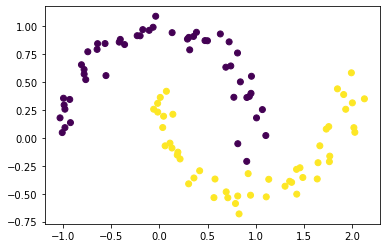

In [ ]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np

x, y = make_moons(n_samples=100, noise=0.1)
plt.scatter(x[:,0], x[:,1], c = y);

In [ ]:
print(get_split(x))

{'index': 0, 'value': -1.0300165601375417, 'groups': ([], [array([ 0.57757111, -0.36787308]), array([-0.55363439,  0.55928197]), array([0.03508896, 0.0936833 ]), array([ 1.35198309, -0.38807266]), array([-0.76335254,  0.52333389]), array([-0.05868451,  0.258024  ]), array([-0.01750977,  0.31049001]), array([ 1.76802199, -0.16275497]), array([-0.40490233,  0.88368336]), array([ 0.1103276 , -0.04601507]), array([0.93348447, 0.37234745]), array([-0.92194985,  0.13763842]), array([2.028306  , 0.05088988]), array([0.04421151, 0.1950962 ]), array([-0.36057843,  0.83763171]), array([ 1.66517922, -0.06994235]), array([-0.742138  ,  0.77300803]), array([ 0.71054036, -0.53570264]), array([0.38513307, 0.94760121]), array([ 0.81324032, -0.51996299]), array([ 0.69357088, -0.48302651]), array([ 1.76412911, -0.21234099]), array([ 1.42560666, -0.50332876]), array([-0.97910461,  0.092921  ]), array([-0.97934728,  0.25806634]), array([-0.99404439,  0.35642565]), array([ 1.63814206, -0.36724473]), array(

**Задание 3**

Выполните задание 2 с помощью sklearn

Построим деревья глубиной 1, 2, 3. Глубину будем менять через переменную max_depth.

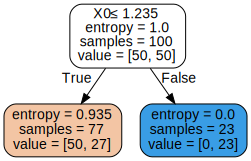

In [ ]:
from sklearn import tree
import graphviz 
clf = tree.DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 1,  min_samples_split = 5,
                              min_samples_leaf = 2, max_features = 2)
clf = clf.fit(x, y)
dot_data = tree.export_graphviz(clf, out_file=None,   filled=True, rounded=True,   special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

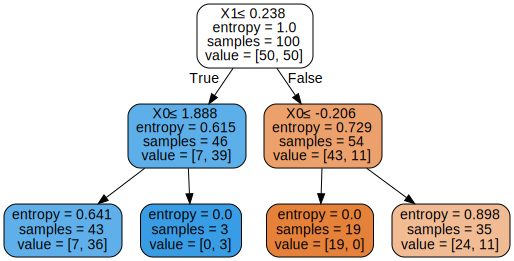

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 2,  min_samples_split = 5,
                              min_samples_leaf = 2, max_features = 2)
clf = clf.fit(x, y)
dot_data = tree.export_graphviz(clf, out_file=None,   filled=True, rounded=True,   special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

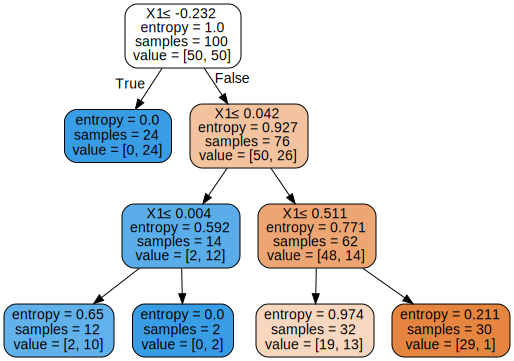

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 3,  min_samples_split = 5,
                              min_samples_leaf = 2, max_features = 2)
clf = clf.fit(x, y)
dot_data = tree.export_graphviz(clf, out_file=None,   filled=True, rounded=True,   special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

Построим дерево максимальной глубины, указав в max_depth None.

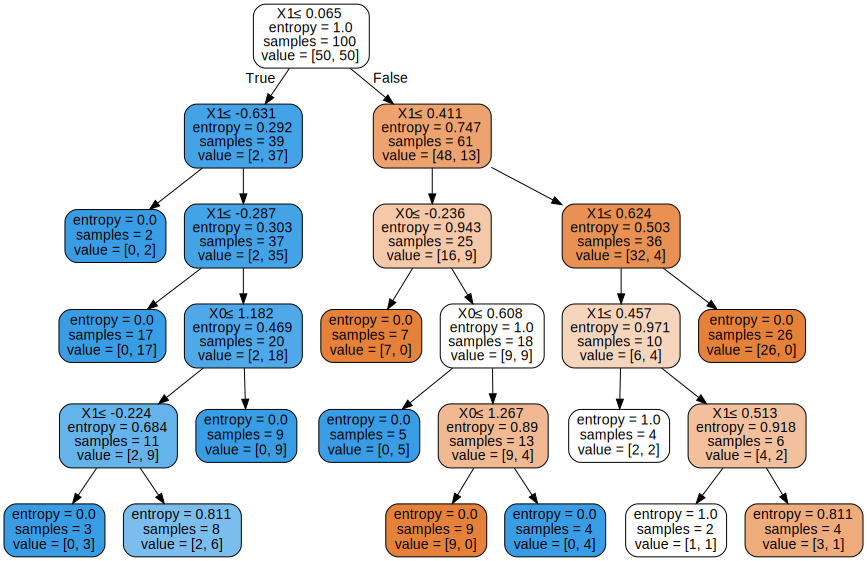

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = None,  min_samples_split = 5,
                              min_samples_leaf = 2, max_features = 2)
clf = clf.fit(x, y)
dot_data = tree.export_graphviz(clf, out_file=None,   filled=True, rounded=True,   special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

Увидим, что максимальная глубина дерева равна 5, а при большей произойдёт переобучение.  
Разделим выборку на тестовую и тренировочную.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
          x, y, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn import metrics
pred=clf.predict(X_test)
print(metrics.classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

